## Observations and Insights 

In [408]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview

mouse_data_complete


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [377]:
# Checking the number of mice.
number_mice = mouse_data_complete["Mouse ID"].nunique()
number_mice



249

In [378]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_data = mouse_data_complete.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)


In [379]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicated_data_df = mouse_data_complete.loc[duplicated_data,:]
duplicated_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [380]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data_complete_index = mouse_data_complete.set_index("Mouse ID")
data_complete = data_complete_index.drop(["g989"])
data_complete_df = data_complete.reset_index()

In [381]:
# Checking the number of mice in the clean DataFrame.
data_complete_df["Mouse ID"].nunique()

248

## Summary Statistics

In [382]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen 
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_regimen = data_complete_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_regimen = data_complete_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_regimen = data_complete_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_regimen = data_complete_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
SEM_regimen = data_complete_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary dataframe.
summary_statistics = pd.concat([mean_regimen, median_regimen,variance_regimen, std_regimen,SEM_regimen], axis="columns")
summary_statistics.columns = ['Mean','Median','Variance','Standar Deviation','SEM']

summary_statistics

 

,Mean,Median,Variance,Standar Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [130]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_statistics = data_complete_df.groupby("Drug Regimen").agg(Mean=pd.NamedAgg(column="Tumor Volume (mm3)", aggfunc= np.mean), Median=pd.NamedAgg(column="Tumor Volume (mm3)", aggfunc= np.median),Variance=pd.NamedAgg(column="Tumor Volume (mm3)", aggfunc=np.var),StandarDeviation=pd.NamedAgg(column="Tumor Volume (mm3)", aggfunc= np.std), SEM=pd.NamedAgg(column="Tumor Volume (mm3)", aggfunc=st.sem))


summary_statistics 

,Mean,Median,Variance,StandarDeviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

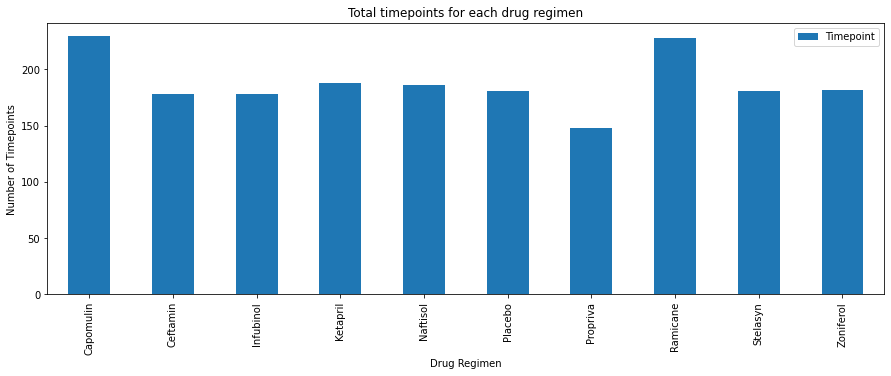

<Figure size 432x288 with 0 Axes>

In [383]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

data_barplot = pd.DataFrame(data_complete_df.groupby("Drug Regimen")["Timepoint"].count())

data_barplot.plot(kind="bar", figsize=(15,5))

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.title("Total timepoints for each drug regimen")

plt.show()
plt.tight_layout()


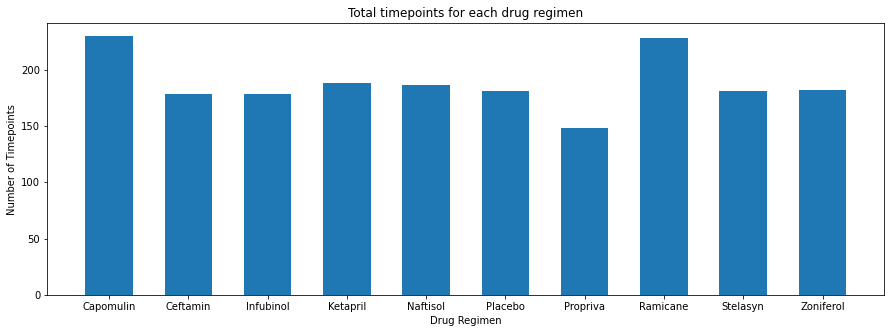

<Figure size 432x288 with 0 Axes>

In [62]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

data_barplot = pd.DataFrame(data_complete_df.groupby("Drug Regimen")["Timepoint"].count())
data_barplot = data_barplot.reset_index()
x_axis = data_barplot["Drug Regimen"]
y_axis = data_barplot["Timepoint"]

plt.figure(figsize=(15,5))
plt.bar(x_axis, y_axis, width=0.6)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.title("Total timepoints for each drug regimen")

plt.show()
plt.tight_layout()


array([<AxesSubplot:ylabel=' '>], dtype=object)

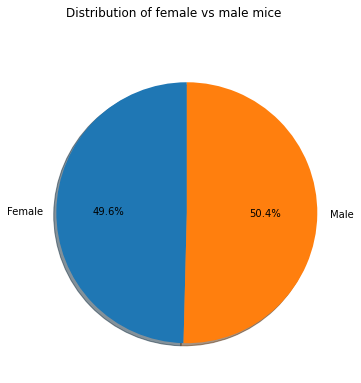

In [384]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
data_pieplot = data_complete_df.groupby("Sex")["Mouse ID"].nunique()
data_pieplot = data_complete_df.groupby("Sex")["Mouse ID"].nunique()
data_pieplot.plot(kind="pie",subplots=True, shadow = True,startangle=90,figsize=(15,6), autopct='%1.1f%%',ylabel=" ", title="Distribution of female vs male mice",)



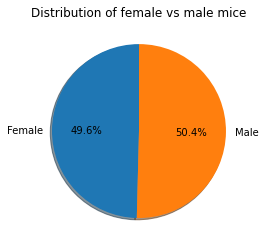

In [385]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

data_pieplot = pd.DataFrame(data_complete_df.groupby("Sex")["Mouse ID"].nunique())
x_axis = data_pieplot["Mouse ID"]
plt.title("Distribution of female vs male mice")
plt.pie(x_axis,autopct="%1.1f%%", shadow=True, startangle=90, labels=["Female","Male"])

plt.show()

## Quartiles, Outliers and Boxplots

In [386]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

greatest_timepoint_df = pd.DataFrame(data_complete_df.groupby("Mouse ID")["Timepoint"].max())
greatest_timepoint_df.reset_index()

tumor_volume_df = data_complete_df[["Mouse ID", "Timepoint","Tumor Volume (mm3)","Drug Regimen"]]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tvolume_df = pd.merge(greatest_timepoint_df, tumor_volume_df, how="left", on=["Mouse ID", "Timepoint"])
final_volume_dfi = final_tvolume_df.set_index("Drug Regimen")


final_tvol = final_volume_dfi.loc[["Capomulin", "Ramicane", "Infubinol", "Ceftamin"],:]

final_tvol

,Mouse ID,Timepoint,Tumor Volume (mm3)
Drug Regimen,,,
Capomulin,b128,45,38.982878
Capomulin,b742,45,38.939633
Capomulin,f966,20,30.485985
Capomulin,g288,45,37.074024
Capomulin,g316,45,40.159220
...,...,...,...
Ceftamin,x226,0,45.000000
Ceftamin,x581,45,64.634949
Ceftamin,x822,45,61.386660


In [315]:
# Put treatments into a list for for loop (and later for plot labels)

drug_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

group_capomulin = final_tvol.loc["Capomulin",:]
tumor_vol_capomulin = group_capomulin["Tumor Volume (mm3)"]
list_capomulin = tumor_vol_capomulin.to_list()


group_ramicame = final_tvol.loc["Ramicane",:]
tumor_vol_ramicane = group_ramicame["Tumor Volume (mm3)"]
list_ramicane = tumor_vol_ramicane.to_list()

group_infubinol = final_tvol.loc["Infubinol",:]
tumor_vol_infubinol = group_infubinol["Tumor Volume (mm3)"]
list_infubinol = tumor_vol_infubinol.to_list()

group_ceftamin = final_tvol.loc["Ceftamin",:]
tumor_vol_ceftamin = group_ceftamin["Tumor Volume (mm3)"]
list_ceftamin = tumor_vol_ceftamin.to_list()


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Determine outliers using upper and lower bounds

#CAPOMULIN
quartiles_c = tumor_vol_capomulin.quantile([.25,.5,.75])
lowerq_c = quartiles_c[0.25]
upperq_c = quartiles_c[0.75]
iqr_c = upperq_c-lowerq_c

print("Capomulin")

print(f"The lower quartile of tumor volume is: {lowerq_c}")
print(f"The upper quartile of tumor volume is: {upperq_c}")
print(f"The interquartile range of tumor volume is: {iqr_c}")
print(f"The the median of tumor volume is: {quartiles_c[0.5]} ")

lower_bound_c = lowerq_c - (1.5*iqr_c)
upper_bound_c = upperq_c + (1.5*iqr_c)
print(f"Values below {lower_bound_c} could be outliers.")
print(f"Values above {upper_bound_c} could be outliers.")

print("-------------------------------------------------------")


#RAMICANE
quartiles_r = tumor_vol_ramicane.quantile([.25,.5,.75])
lowerq_r = quartiles_r[0.25]
upperq_r = quartiles_r[0.75]
iqr_r = upperq_r-lowerq_r

print("Ramicane")

print(f"The lower quartile of tumor volume is: {lowerq_r}")
print(f"The upper quartile of tumor volume is: {upperq_r}")
print(f"The interquartile range of tumor volume is: {iqr_r}")
print(f"The the median of tumor volume is: {quartiles_r[0.5]} ")



lower_bound_r = lowerq_r - (1.5*iqr_r)
upper_bound_r = upperq_r + (1.5*iqr_r)
print(f"Values below {lower_bound_r} could be outliers.")
print(f"Values above {upper_bound_r} could be outliers.")

print("-------------------------------------------------------")

#INFUBINOL
quartiles_i = tumor_vol_infubinol.quantile([.25,.5,.75])
lowerq_i = quartiles_i[0.25]
upperq_i = quartiles_i[0.75]
iqr_i = upperq_i-lowerq_i

print("Infubinol")

print(f"The lower quartile of tumor volume is: {lowerq_i}")
print(f"The upper quartile of tumor volume is: {upperq_i}")
print(f"The interquartile range of tumor volume is: {iqr_i}")
print(f"The the median of tumor volume is: {quartiles_i[0.5]} ")

lower_bound_i = lowerq_i - (1.5*iqr_i)
upper_bound_i = upperq_i + (1.5*iqr_i)
print(f"Values below {lower_bound_i} could be outliers.")
print(f"Values above {upper_bound_i} could be outliers.")

print("-------------------------------------------------------")

#CEFTAMIN
quartiles_ce = tumor_vol_ceftamin.quantile([.25,.5,.75])
lowerq_ce = quartiles_ce[0.25]
upperq_ce = quartiles_ce[0.75]
iqr_ce = upperq_ce-lowerq_ce

print("Ceftamin")

print(f"The lower quartile of tumor volume is: {lowerq_ce}")
print(f"The upper quartile of tumor volume is: {upperq_ce}")
print(f"The interquartile range of tumor volume is: {iqr_ce}")
print(f"The the median of tumor volume is: {quartiles_ce[0.5]} ")

lower_bound_ce = lowerq_ce - (1.5*iqr_ce)
upper_bound_ce = upperq_ce + (1.5*iqr_ce)
print(f"Values below {lower_bound_ce} could be outliers.")
print(f"Values above {upper_bound_ce} could be outliers.")

    

Capomulin
The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volume is: 7.781863460000004
The the median of tumor volume is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
-------------------------------------------------------
Ramicane
The lower quartile of tumor volume is: 31.56046955
The upper quartile of tumor volume is: 40.65900627
The interquartile range of tumor volume is: 9.098536719999998
The the median of tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
-------------------------------------------------------
Infubinol
The lower quartile of tumor volume is: 54.04860769
The upper quartile of tumor volume is: 65.52574285
The interquartile range of tumor volume is: 11.477135160000003
The the median of tumor volume is: 60.16518046 
Values below 36.83290494999999 coul

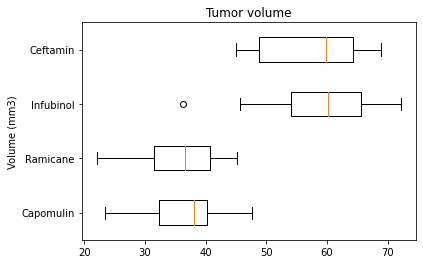

In [387]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor volume')
ax1.set_ylabel('Volume (mm3)')

data = [list_capomulin, list_ramicane, list_infubinol, list_ceftamin]
ax1.boxplot(data, vert=False,)
plt.yticks ([1,2,3,4],["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()

## Line and Scatter Plots

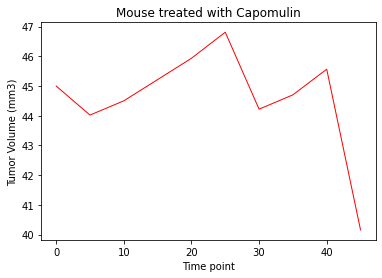

,Tumor Volume (mm3),Timepoint
Mouse ID,,
g316,45.000000,0
g316,44.022752,5
g316,44.502042,10
g316,45.216743,15
g316,45.933322,20
g316,46.809225,25
g316,44.221480,30
g316,44.702833,35
g316,45.565821,40


In [388]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
data_index = data_complete_df.set_index("Mouse ID")
line_capomulin = data_index.loc[["g316"],["Tumor Volume (mm3)", "Timepoint"]]

plt.title("Mouse treated with Capomulin")
plt.xlabel("Time point")
plt.ylabel("Tumor Volume (mm3)")
x_axis = line_capomulin["Timepoint"]
y_axis = line_capomulin["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis, color="red", linewidth=1)
plt.show()
line_capomulin

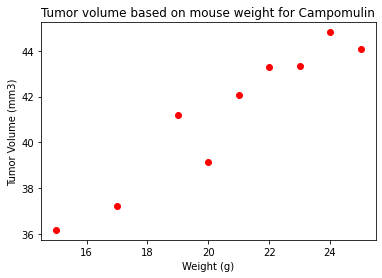

In [373]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
data_index = data_complete_df.set_index("Drug Regimen")
data_capomulin = data_index.loc[["Capomulin"],["Tumor Volume (mm3)", "Weight (g)"]]
data_capomulin.reset_index()
scatter_capomulin = pd.DataFrame(data_capomulin.groupby("Weight (g)")["Tumor Volume (mm3)"].mean())
scatter_capomulin_data = scatter_capomulin.reset_index()
scatter_capomulin_data

plt.title("Tumor volume based on mouse weight for Campomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")


x_axis = scatter_capomulin_data["Weight (g)"]
y_axis = scatter_capomulin_data["Tumor Volume (mm3)"]
plt.scatter(x_axis,y_axis, marker="o", color="red")
plt.show()

## Correlation and Regression

The correlation coefficient between tumor volume and color weight for the Capomulin regimen is 0.95


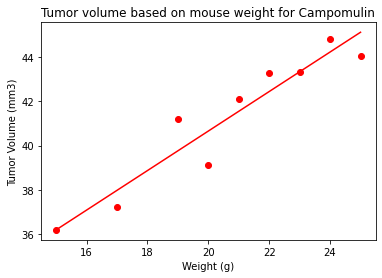

y = 0.89x + 22.76


In [412]:
# Calculate the correlation coefficient and linear regression model 

# for mouse weight and average tumor volume for the Capomulin regimen

print(f"The correlation coefficient between tumor volume and color weight for the Capomulin regimen is {round(st.pearsonr(x_axis,y_axis)[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis,regress_values,"r-")

plt.title("Tumor volume based on mouse weight for Campomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")


x_axis = scatter_capomulin_data["Weight (g)"]
y_axis = scatter_capomulin_data["Tumor Volume (mm3)"]
plt.scatter(x_axis,y_axis, marker="o", color="red")
plt.show()

print(line_eq)
